In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging
from functools import partial
from dask.local import get_async
from dask import bag as db
from dask import array as da
import dask.delayed
import sprite2
import numpy as np
from matplotlib import pyplot as plt
import sprite2.aws
import sprite2.dask
import os
import time

In [3]:
# set up logging
logging.basicConfig(
    level=logging.DEBUG,
    format='%(levelname)-5s %(asctime)s %(threadName)s: %(message)s')
logging.debug("test1")

root_logger = logging.getLogger()
root_logger.setLevel(logging.DEBUG)

logger = logging.getLogger('sprite2')
logger.setLevel(logging.DEBUG)

DEBUG 2018-04-26 09:32:32,245 MainThread: test1


## dask delayed

In [4]:
def computeit(i):
    logger.debug(f'calling {i}')
    sum(range(40000000))
    logger.debug(f'done {i}')
    return i

In [5]:
ds = [dask.delayed(computeit)(i) for i in range(16)]
ds

[Delayed('computeit-d08166e2-db13-4032-b570-0f72f97ffc4f'),
 Delayed('computeit-659dbd7a-2bb6-4f9d-bd28-bcadac500994'),
 Delayed('computeit-3c62d3ec-6727-4460-bcbd-08f6f07f4d44'),
 Delayed('computeit-3b666172-6c87-431d-bf55-068a9f5f9200'),
 Delayed('computeit-684fda55-ea8b-4f11-9407-444abf06f94e'),
 Delayed('computeit-3c084982-13d5-481c-a928-84a3fc6e68a5'),
 Delayed('computeit-2553e7ed-a257-46b5-b29a-2f071ef4440f'),
 Delayed('computeit-15b042a0-a1e4-43b7-86a3-cfe65b351a13'),
 Delayed('computeit-acd9d7cf-8c1d-46f8-924a-f6b272fb68c0'),
 Delayed('computeit-07a389fd-1165-4265-ac1a-1e84d8ab7ac2'),
 Delayed('computeit-75272487-4aad-4cbc-8220-251a7bb9b22e'),
 Delayed('computeit-2f850701-222f-4922-ad55-5868730f02d7'),
 Delayed('computeit-1c93422d-2a8a-4d32-bb5b-b97b6ad1ff75'),
 Delayed('computeit-11c08f8f-3d87-474a-a133-e9c41c684e60'),
 Delayed('computeit-bca39428-e362-4249-9a54-f0a0fdafe03d'),
 Delayed('computeit-005ce5dd-5562-4984-a9d6-fe19c186d072')]

In [6]:
t = dask.delayed(sum)(ds)

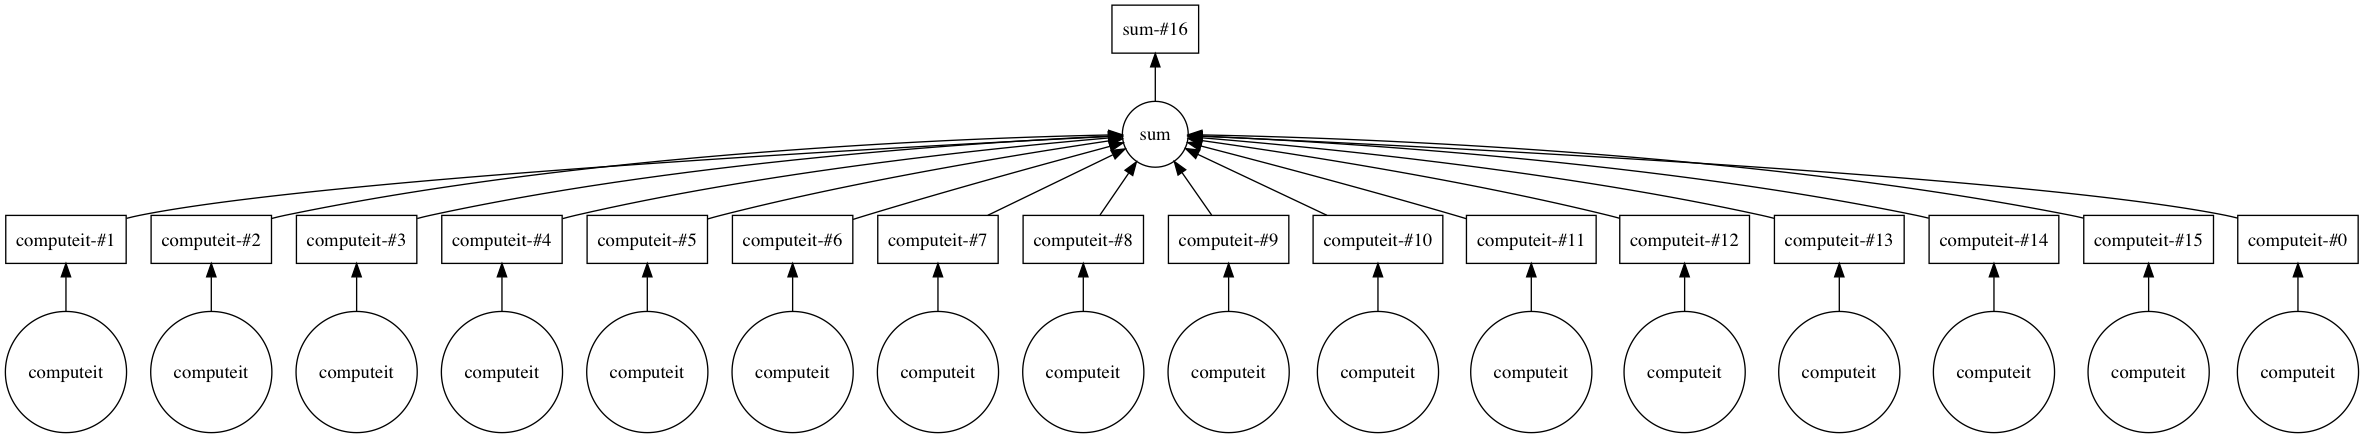

In [7]:
t.visualize()

In [8]:
#%time t.compute(get=dask.threaded.get, num_workers=8)

In [9]:
%time sum_all = t.compute(get=sprite2.dask.get, num_workers=16)

DEBUG 2018-04-26 09:32:32,448 ThreadPoolExecutor-0_0: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,453 ThreadPoolExecutor-0_1: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,458 ThreadPoolExecutor-0_2: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,461 ThreadPoolExecutor-0_3: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,462 ThreadPoolExecutor-0_0: Loading variable config_file from defaults.
DEBUG 2018-04-26 09:32:32,466 ThreadPoolExecutor-0_4: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,467 ThreadPoolExecutor-0_1: Loading variable config_file from defaults.
DEBUG 2018-04-26 09:32:32,471 ThreadPoolExecutor-0_5: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,472 ThreadPoolExecutor-0_2: Loading variable config_file from de

DEBUG 2018-04-26 09:32:32,596 ThreadPoolExecutor-0_10: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,598 ThreadPoolExecutor-0_3: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,599 ThreadPoolExecutor-0_4: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,602 ThreadPoolExecutor-0_11: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,603 ThreadPoolExecutor-0_12: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,604 ThreadPoolExecutor-0_13: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,605 ThreadPoolExecutor-0_14: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,606 ThreadPoolExecutor-0_5: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,607 ThreadPoolExe

DEBUG 2018-04-26 09:32:32,669 ThreadPoolExecutor-0_0: Loading variable api_versions from defaults.
DEBUG 2018-04-26 09:32:32,670 ThreadPoolExecutor-0_15: Loading variable ca_bundle from defaults.
DEBUG 2018-04-26 09:32:32,671 ThreadPoolExecutor-0_1: Loading variable api_versions from defaults.
DEBUG 2018-04-26 09:32:32,672 ThreadPoolExecutor-0_2: Loading variable api_versions from defaults.
DEBUG 2018-04-26 09:32:32,672 ThreadPoolExecutor-0_6: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,673 ThreadPoolExecutor-0_7: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,673 ThreadPoolExecutor-0_8: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,674 ThreadPoolExecutor-0_9: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,674 ThreadPoolExecutor-0_10: Loading variable profile from environment with value 'personal'.
DEBUG 2018

DEBUG 2018-04-26 09:32:32,738 ThreadPoolExecutor-0_12: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,739 ThreadPoolExecutor-0_14: Loading variable config_file from defaults.
DEBUG 2018-04-26 09:32:32,740 ThreadPoolExecutor-0_5: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,741 ThreadPoolExecutor-0_0: Loading variable metadata_service_timeout from defaults.
DEBUG 2018-04-26 09:32:32,742 ThreadPoolExecutor-0_15: Loading variable config_file from defaults.
DEBUG 2018-04-26 09:32:32,743 ThreadPoolExecutor-0_1: Loading variable metadata_service_timeout from defaults.
DEBUG 2018-04-26 09:32:32,743 ThreadPoolExecutor-0_2: Loading variable metadata_service_timeout from defaults.
DEBUG 2018-04-26 09:32:32,744 ThreadPoolExecutor-0_6: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,745 ThreadPoolExecutor-0_7: Loading variable profile from environment with value 'per

DEBUG 2018-04-26 09:32:32,807 ThreadPoolExecutor-0_8: Loading variable profile from defaults.
DEBUG 2018-04-26 09:32:32,808 ThreadPoolExecutor-0_9: Loading variable profile from defaults.
DEBUG 2018-04-26 09:32:32,810 ThreadPoolExecutor-0_10: Loading variable profile from defaults.
DEBUG 2018-04-26 09:32:32,811 ThreadPoolExecutor-0_3: Looking for credentials via: env
DEBUG 2018-04-26 09:32:32,812 ThreadPoolExecutor-0_4: Looking for credentials via: env
DEBUG 2018-04-26 09:32:32,813 ThreadPoolExecutor-0_11: Loading variable profile from defaults.
DEBUG 2018-04-26 09:32:32,814 ThreadPoolExecutor-0_13: Loading variable metadata_service_num_attempts from defaults.
DEBUG 2018-04-26 09:32:32,815 ThreadPoolExecutor-0_12: Looking for credentials via: env
DEBUG 2018-04-26 09:32:32,816 ThreadPoolExecutor-0_14: Loading variable profile from defaults.
DEBUG 2018-04-26 09:32:32,817 ThreadPoolExecutor-0_5: Looking for credentials via: env
DEBUG 2018-04-26 09:32:32,818 ThreadPoolExecutor-0_0: Looking

INFO  2018-04-26 09:32:32,882 ThreadPoolExecutor-0_15: Found credentials in shared credentials file: ~/.aws/credentials
DEBUG 2018-04-26 09:32:32,886 ThreadPoolExecutor-0_1: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,893 ThreadPoolExecutor-0_2: Loading variable profile from environment with value 'personal'.
DEBUG 2018-04-26 09:32:32,895 ThreadPoolExecutor-0_7: Loading JSON file: /Users/sayre/dev/venvs/sandbox/sprite2/lib/python3.6/site-packages/botocore/data/endpoints.json
DEBUG 2018-04-26 09:32:32,895 ThreadPoolExecutor-0_6: Loading JSON file: /Users/sayre/dev/venvs/sandbox/sprite2/lib/python3.6/site-packages/botocore/data/endpoints.json
DEBUG 2018-04-26 09:32:32,896 ThreadPoolExecutor-0_8: Loading JSON file: /Users/sayre/dev/venvs/sandbox/sprite2/lib/python3.6/site-packages/botocore/data/endpoints.json
DEBUG 2018-04-26 09:32:32,899 ThreadPoolExecutor-0_9: Loading JSON file: /Users/sayre/dev/venvs/sandbox/sprite2/lib/python3.6/site-pack

DEBUG 2018-04-26 09:32:33,338 ThreadPoolExecutor-0_6: Event creating-client-class.lambda: calling handler <function add_generate_presigned_url at 0x10c0bb6a8>
DEBUG 2018-04-26 09:32:33,339 ThreadPoolExecutor-0_4: Loading JSON file: /Users/sayre/dev/venvs/sandbox/sprite2/lib/python3.6/site-packages/botocore/data/lambda/2015-03-31/service-2.json
DEBUG 2018-04-26 09:32:33,339 ThreadPoolExecutor-0_2: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,340 ThreadPoolExecutor-0_3: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,341 ThreadPoolExecutor-0_1: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,341 ThreadPoolExecutor-0_0: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,344 ThreadPoolExecutor-0_6: The s3 config key is not a dictionary type, ignoring its value of: None
DEBUG 2018-04-26 09:32:33,346 ThreadPoolExecutor-0_7: Event creating-client-class.lambda: calling handler <function add_generate_presigned_url at 0x10c0bb6a8>
DEBUG 2018-04

DEBUG 2018-04-26 09:32:33,483 ThreadPoolExecutor-0_8: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,486 ThreadPoolExecutor-0_10: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,487 ThreadPoolExecutor-0_3: Event before-parameter-build.lambda.Invoke: calling handler <function generate_idempotent_uuid at 0x10c109048>
DEBUG 2018-04-26 09:32:33,488 ThreadPoolExecutor-0_1: Event before-parameter-build.lambda.Invoke: calling handler <function generate_idempotent_uuid at 0x10c109048>
DEBUG 2018-04-26 09:32:33,493 ThreadPoolExecutor-0_0: Event before-parameter-build.lambda.Invoke: calling handler <function generate_idempotent_uuid at 0x10c109048>
DEBUG 2018-04-26 09:32:33,494 ThreadPoolExecutor-0_15: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,498 ThreadPoolExecutor-0_5: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,498 ThreadPoolExecutor-0_6: computeit-2f850701-222f-4922-ad55-5868730f02d7 sending 1.2KB
DEBUG 2018-04-26 09:32:33,500 Th

DEBUG 2018-04-26 09:32:33,519 ThreadPoolExecutor-0_5: Loading JSON file: /Users/sayre/dev/venvs/sandbox/sprite2/lib/python3.6/site-packages/botocore/data/_retry.json
DEBUG 2018-04-26 09:32:33,519 ThreadPoolExecutor-0_15: Loading JSON file: /Users/sayre/dev/venvs/sandbox/sprite2/lib/python3.6/site-packages/botocore/data/_retry.json
DEBUG 2018-04-26 09:32:33,519 ThreadPoolExecutor-0_6: Event before-parameter-build.lambda.Invoke: calling handler <function generate_idempotent_uuid at 0x10c109048>
DEBUG 2018-04-26 09:32:33,520 ThreadPoolExecutor-0_7: computeit-3b666172-6c87-431d-bf55-068a9f5f9200 sending 1.2KB
DEBUG 2018-04-26 09:32:33,521 ThreadPoolExecutor-0_4: computeit-1c93422d-2a8a-4d32-bb5b-b97b6ad1ff75 sending 1.2KB
DEBUG 2018-04-26 09:32:33,524 ThreadPoolExecutor-0_11: Setting lambda timeout as (60, 60)
DEBUG 2018-04-26 09:32:33,525 ThreadPoolExecutor-0_9: Loading JSON file: /Users/sayre/dev/venvs/sandbox/sprite2/lib/python3.6/site-packages/botocore/data/_retry.json
DEBUG 2018-04-26

DEBUG 2018-04-26 09:32:33,561 ThreadPoolExecutor-0_4: Making request for OperationModel(name=Invoke) (verify_ssl=True) with params: {'url_path': '/2015-03-31/functions/sprite/invocations', 'query_string': {}, 'method': 'POST', 'headers': {'X-Amz-Client-Context': 'eyJjdXN0b20iOiB7InJlcXVlc3RfaWQiOiAiY29tcHV0ZWl0LTFjOTM0MjJkLTJhOGEtNGQzMi1iYjViLWI5N2I2YWQxZmY3NSJ9fQ==', 'User-Agent': 'Boto3/1.7.6 Python/3.6.5 Darwin/15.6.0 Botocore/1.10.7'}, 'body': b'"gASVmgMAAAAAAACMF2Nsb3VkcGlja2xlLmNsb3VkcGlja2xllIwOX2ZpbGxfZnVuY3Rpb26Uk5Qo\\naACMD19tYWtlX3NrZWxfZnVuY5STlGgAjA1fYnVpbHRpbl90eXBllJOUjAhDb2RlVHlwZZSFlFKU\\nKEsASwBLAEsDSxNDDIgCagCIAIgBjgFTAJROhZSMBGZ1bmOUhZQpjC8vVXNlcnMvc2F5cmUvZGV2\\nL3NhbmRib3gvc3ByaXRlMi9zcHJpdGUyL2F3cy5weZSMCDxsYW1iZGE+lEtRQwCUjARhcmdzlIwE\\na3dkc5SMBHNlbGaUh5QpdJRSlEsDfZSHlFKUfZQojAdnbG9iYWxzlH2UjAhkZWZhdWx0c5ROjARk\\naWN0lH2UjAZtb2R1bGWUjAtzcHJpdGUyLmF3c5SMDmNsb3N1cmVfdmFsdWVzlF2UKCiMLmNvbXB1\\ndGVpdC0xYzkzNDIyZC0yYThhLTRkMzItYmI1Yi1iOTdiNmFkMWZmNzWUaAIoaARoCShLAUs

DEBUG 2018-04-26 09:32:33,585 ThreadPoolExecutor-0_2: CanonicalRequest:
POST
/2015-03-31/functions/sprite/invocations

host:lambda.us-east-1.amazonaws.com
x-amz-client-context:eyJjdXN0b20iOiB7InJlcXVlc3RfaWQiOiAiY29tcHV0ZWl0LTExYzA4ZjhmLTNkODctNDc0YS1hMTMzLWU5YzQxYzY4NGU2MCJ9fQ==
x-amz-date:20180426T133233Z

host;x-amz-client-context;x-amz-date
fdc69593c497b3484653319a6ef134e0ac401c4a0559404467128baaafac4aca
DEBUG 2018-04-26 09:32:33,585 ThreadPoolExecutor-0_8: Making request for OperationModel(name=Invoke) (verify_ssl=True) with params: {'url_path': '/2015-03-31/functions/sprite/invocations', 'query_string': {}, 'method': 'POST', 'headers': {'X-Amz-Client-Context': 'eyJjdXN0b20iOiB7InJlcXVlc3RfaWQiOiAiY29tcHV0ZWl0LTNjMDg0OTgyLTEzZDUtNDgxYy1hOTI4LTg0YTNmYzZlNjhhNSJ9fQ==', 'User-Agent': 'Boto3/1.7.6 Python/3.6.5 Darwin/15.6.0 Botocore/1.10.7'}, 'body': b'"gASVmgMAAAAAAACMF2Nsb3VkcGlja2xlLmNsb3VkcGlja2xllIwOX2ZpbGxfZnVuY3Rpb26Uk5Qo\\naACMD19tYWtlX3NrZWxfZnVuY5STlGgAjA1fYnVpbHRpbl90eXBllJ

DEBUG 2018-04-26 09:32:33,590 ThreadPoolExecutor-0_6: Calculating signature using v4 auth.
DEBUG 2018-04-26 09:32:33,591 ThreadPoolExecutor-0_7: Event choose-signer.lambda.Invoke: calling handler <function set_operation_specific_signer at 0x10c106ea0>
DEBUG 2018-04-26 09:32:33,591 ThreadPoolExecutor-0_4: Event choose-signer.lambda.Invoke: calling handler <function set_operation_specific_signer at 0x10c106ea0>
DEBUG 2018-04-26 09:32:33,592 ThreadPoolExecutor-0_11: Event before-parameter-build.lambda.Invoke: calling handler <function generate_idempotent_uuid at 0x10c109048>
DEBUG 2018-04-26 09:32:33,592 ThreadPoolExecutor-0_9: Making request for OperationModel(name=Invoke) (verify_ssl=True) with params: {'url_path': '/2015-03-31/functions/sprite/invocations', 'query_string': {}, 'method': 'POST', 'headers': {'X-Amz-Client-Context': 'eyJjdXN0b20iOiB7InJlcXVlc3RfaWQiOiAiY29tcHV0ZWl0LTNjNjJkM2VjLTY3MjctNDQ2MC1iY2JkLTA4ZjZmMDdmNGQ0NCJ9fQ==', 'User-Agent': 'Boto3/1.7.6 Python/3.6.5 Darwin/15.

DEBUG 2018-04-26 09:32:33,607 ThreadPoolExecutor-0_9: Event request-created.lambda.Invoke: calling handler <bound method RequestSigner.handler of <botocore.signers.RequestSigner object at 0x10ea981d0>>
DEBUG 2018-04-26 09:32:33,607 ThreadPoolExecutor-0_12: Event choose-signer.lambda.Invoke: calling handler <function set_operation_specific_signer at 0x10c106ea0>
DEBUG 2018-04-26 09:32:33,608 ThreadPoolExecutor-0_14: Event choose-signer.lambda.Invoke: calling handler <function set_operation_specific_signer at 0x10c106ea0>
DEBUG 2018-04-26 09:32:33,609 ThreadPoolExecutor-0_2: Signature:
95b56ce918366e4d7abbd3de5ddb94b20012d9ac3dc50c5b1b7e6e5b83fbd475
DEBUG 2018-04-26 09:32:33,609 ThreadPoolExecutor-0_8: Event choose-signer.lambda.Invoke: calling handler <function set_operation_specific_signer at 0x10c106ea0>
DEBUG 2018-04-26 09:32:33,610 ThreadPoolExecutor-0_13: Event request-created.lambda.Invoke: calling handler <bound method RequestSigner.handler of <botocore.signers.RequestSigner obje

DEBUG 2018-04-26 09:32:33,653 ThreadPoolExecutor-0_11: Event choose-signer.lambda.Invoke: calling handler <function set_operation_specific_signer at 0x10c106ea0>
DEBUG 2018-04-26 09:32:33,654 ThreadPoolExecutor-0_9: Calculating signature using v4 auth.
DEBUG 2018-04-26 09:32:33,655 ThreadPoolExecutor-0_12: CanonicalRequest:
POST
/2015-03-31/functions/sprite/invocations

host:lambda.us-east-1.amazonaws.com
x-amz-client-context:eyJjdXN0b20iOiB7InJlcXVlc3RfaWQiOiAiY29tcHV0ZWl0LTc1MjcyNDg3LTRhYWQtNGNiYy04MjIwLTI1MWE3YmI5YjIyZSJ9fQ==
x-amz-date:20180426T133233Z

host;x-amz-client-context;x-amz-date
139810ec7923c6958a1a36485ac63ae8514a52d22f894097568850ea1294cbd1
INFO  2018-04-26 09:32:33,656 ThreadPoolExecutor-0_2: Starting new HTTPS connection (1): lambda.us-east-1.amazonaws.com
DEBUG 2018-04-26 09:32:33,657 ThreadPoolExecutor-0_8: CanonicalRequest:
POST
/2015-03-31/functions/sprite/invocations

host:lambda.us-east-1.amazonaws.com
x-amz-client-context:eyJjdXN0b20iOiB7InJlcXVlc3RfaWQiOiAiY2

DEBUG 2018-04-26 09:32:35,024 ThreadPoolExecutor-0_3: "POST /2015-03-31/functions/sprite/invocations HTTP/1.1" 200 110
DEBUG 2018-04-26 09:32:35,024 ThreadPoolExecutor-0_6: "POST /2015-03-31/functions/sprite/invocations HTTP/1.1" 200 110
DEBUG 2018-04-26 09:32:35,024 ThreadPoolExecutor-0_11: "POST /2015-03-31/functions/sprite/invocations HTTP/1.1" 200 110
DEBUG 2018-04-26 09:32:35,026 ThreadPoolExecutor-0_4: Response headers: {'date': 'Thu, 26 Apr 2018 13:32:34 GMT', 'content-type': 'application/json', 'content-length': '110', 'connection': 'keep-alive', 'x-amzn-requestid': '46f6e1d8-4956-11e8-8629-135fb1be4f99', 'x-amzn-remapped-content-length': '0', 'x-amz-executed-version': '$LATEST', 'x-amzn-trace-id': 'root=1-5ae1d4f2-52d0d158cb24fb48844cb940;sampled=0'}
DEBUG 2018-04-26 09:32:35,027 ThreadPoolExecutor-0_7: Response headers: {'date': 'Thu, 26 Apr 2018 13:32:34 GMT', 'content-type': 'application/json', 'content-length': '110', 'connection': 'keep-alive', 'x-amzn-requestid': '46f66d

DEBUG 2018-04-26 09:32:35,145 ThreadPoolExecutor-0_10: "POST /2015-03-31/functions/sprite/invocations HTTP/1.1" 200 110
DEBUG 2018-04-26 09:32:35,145 ThreadPoolExecutor-0_15: "POST /2015-03-31/functions/sprite/invocations HTTP/1.1" 200 110
DEBUG 2018-04-26 09:32:35,147 ThreadPoolExecutor-0_8: Response headers: {'date': 'Thu, 26 Apr 2018 13:32:35 GMT', 'content-type': 'application/json', 'content-length': '110', 'connection': 'keep-alive', 'x-amzn-requestid': '46f75752-4956-11e8-8b18-fb1894466f8b', 'x-amzn-remapped-content-length': '0', 'x-amz-executed-version': '$LATEST', 'x-amzn-trace-id': 'root=1-5ae1d4f2-ac0b02e0a3a8dd1870a0c1e8;sampled=0'}
DEBUG 2018-04-26 09:32:35,147 ThreadPoolExecutor-0_10: Response headers: {'date': 'Thu, 26 Apr 2018 13:32:35 GMT', 'content-type': 'application/json', 'content-length': '110', 'connection': 'keep-alive', 'x-amzn-requestid': '46f66d59-4956-11e8-a3a9-8fcac87ad722', 'x-amzn-remapped-content-length': '0', 'x-amz-executed-version': '$LATEST', 'x-amzn-

DEBUG 2018-04-26 09:32:35,262 ThreadPoolExecutor-0_14: Event request-created.lambda.Invoke: calling handler <bound method RequestSigner.handler of <botocore.signers.RequestSigner object at 0x10ea981d0>>
DEBUG 2018-04-26 09:32:35,263 ThreadPoolExecutor-0_14: Event choose-signer.lambda.Invoke: calling handler <function set_operation_specific_signer at 0x10c106ea0>
DEBUG 2018-04-26 09:32:35,264 ThreadPoolExecutor-0_14: Calculating signature using v4 auth.
DEBUG 2018-04-26 09:32:35,264 ThreadPoolExecutor-0_14: CanonicalRequest:
POST
/2015-03-31/functions/sprite/invocations

host:lambda.us-east-1.amazonaws.com
x-amz-client-context:eyJjdXN0b20iOiB7InJlcXVlc3RfaWQiOiAic3VtLWQ3N2YwNzRlLTNmM2ItNDk1Ni1hNjkyLTg1MzRjOGZkOWU3MCJ9fQ==
x-amz-date:20180426T133235Z

host;x-amz-client-context;x-amz-date
f0c3de8d8cdc6893ec2e1bca83788121b3b99b68a8c015e36901d48c21f20b77
DEBUG 2018-04-26 09:32:35,265 ThreadPoolExecutor-0_14: StringToSign:
AWS4-HMAC-SHA256
20180426T133235Z
20180426/us-east-1/lambda/aws4_requ

CPU times: user 1.33 s, sys: 706 ms, total: 2.04 s
Wall time: 2.85 s


In [10]:
sum_all

120

## dask bag

In [11]:
root_logger.setLevel(logging.ERROR)
logger.setLevel(logging.INFO)

In [12]:
b = db.range(100, npartitions=10)
b.map(lambda o: o*o)
bsum = b.sum()

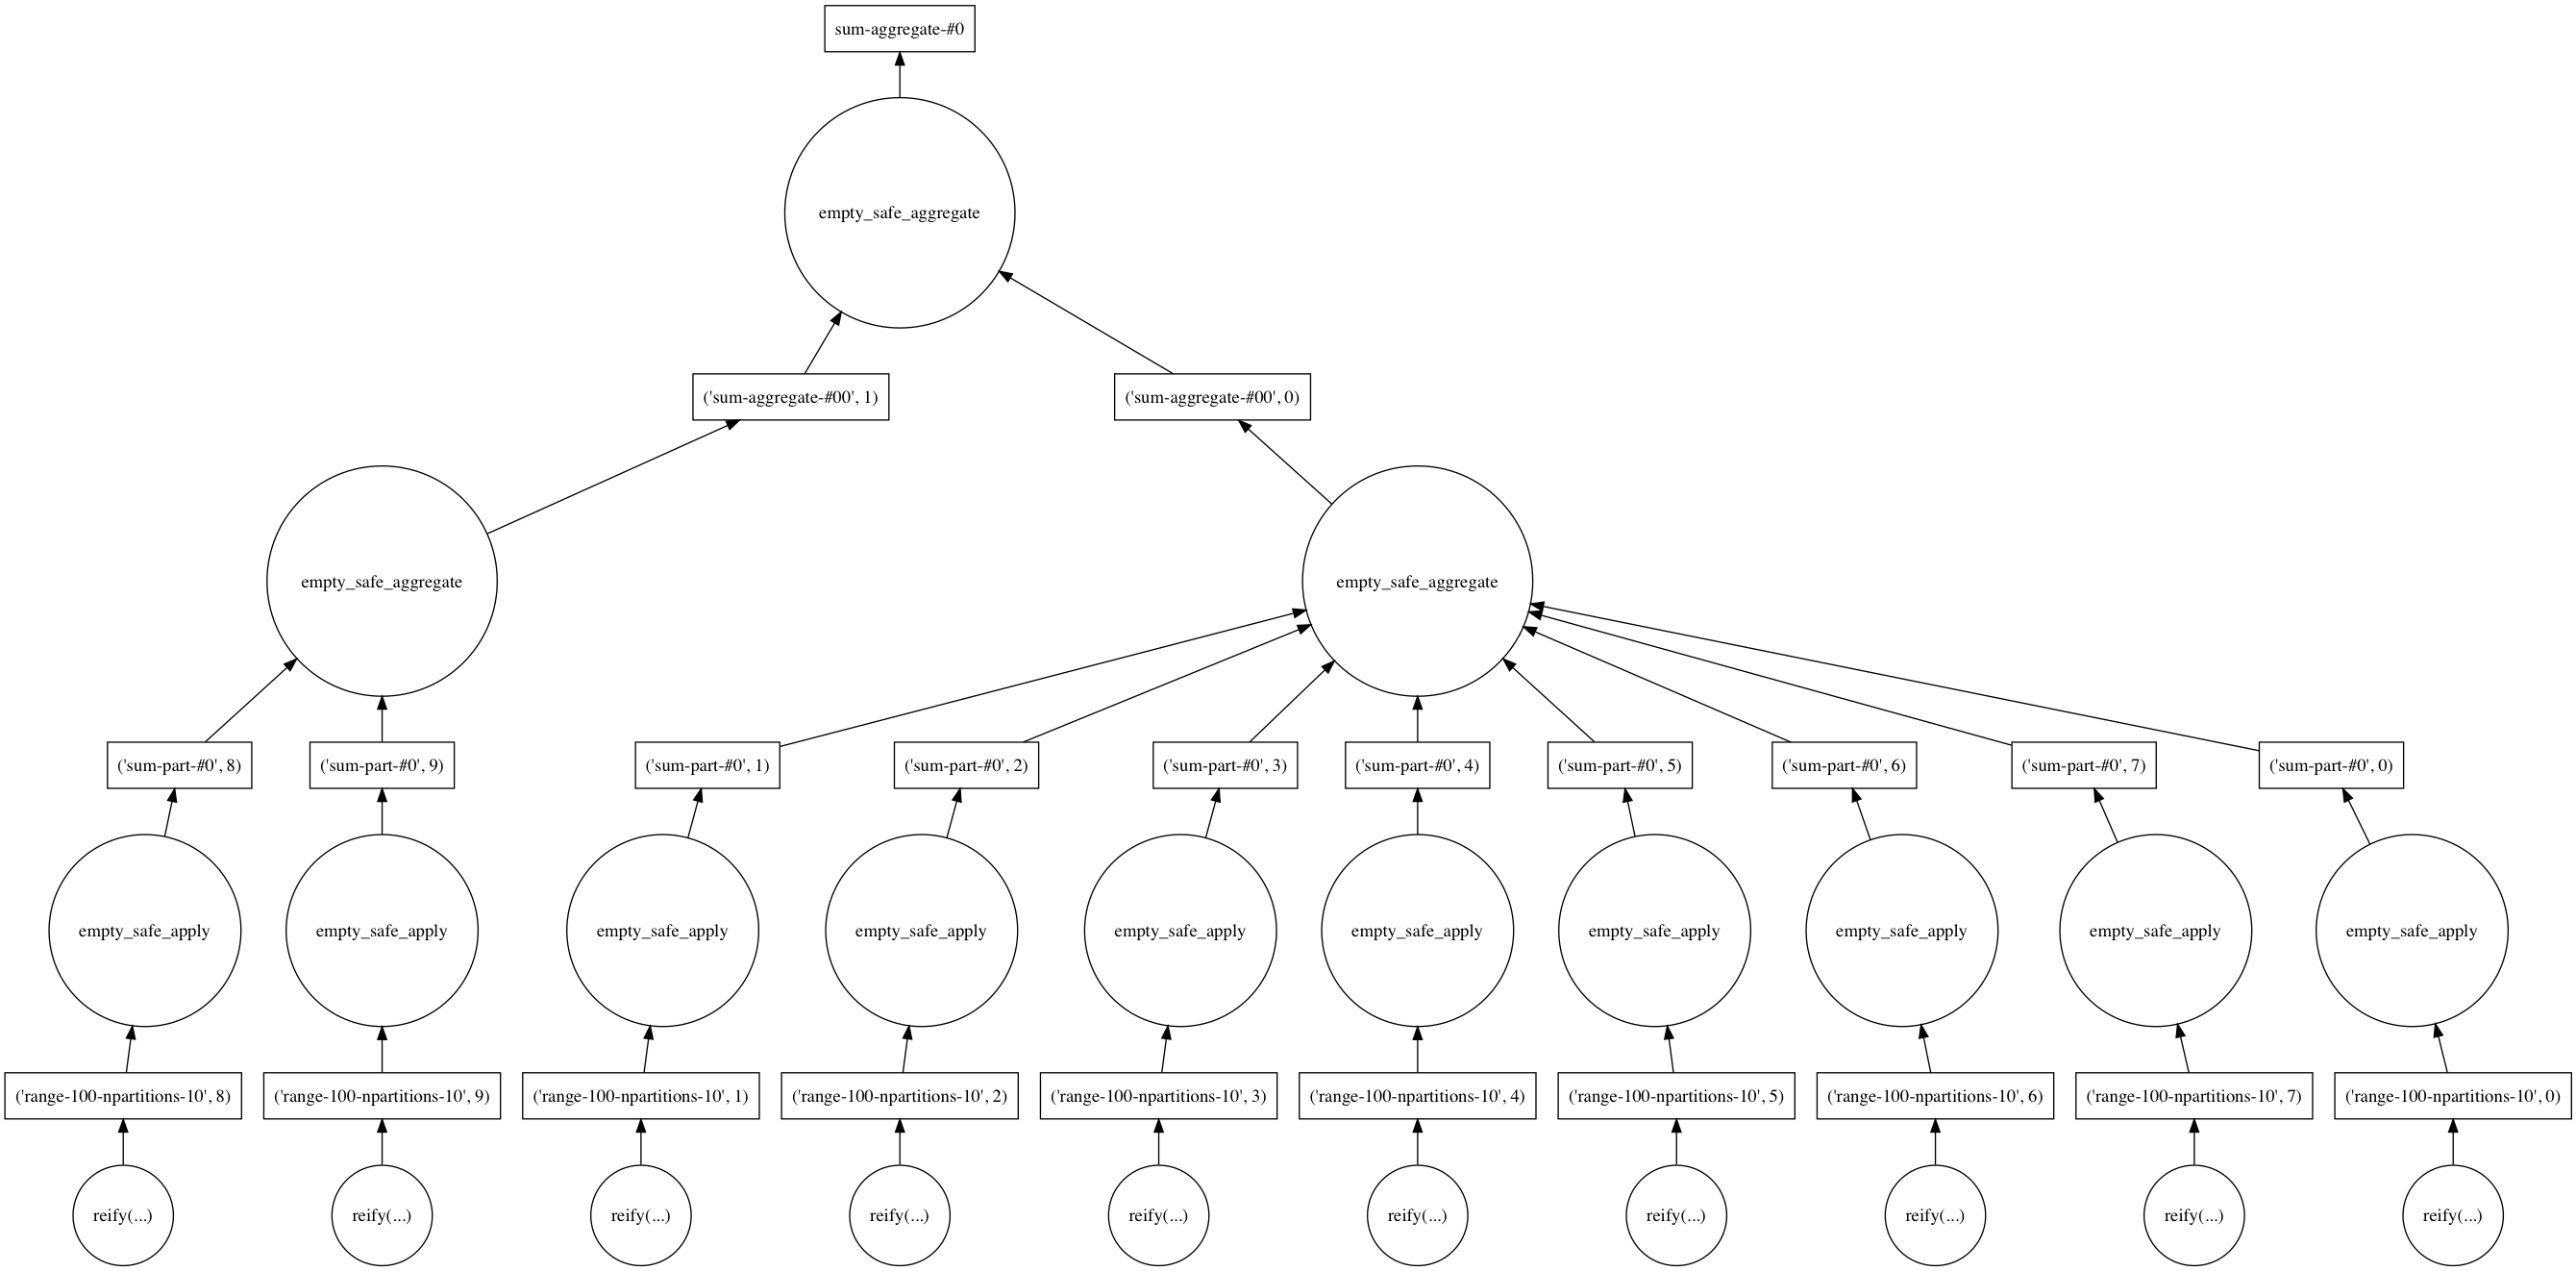

In [13]:
bsum.visualize()

In [14]:
%timeit -n 3 bsum.compute(get=sprite2.dask.get)

152 ms ± 39.5 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


### Dask Array

In [15]:
root_logger.setLevel(logging.ERROR)
logger.setLevel(logging.INFO)

In [16]:
arrsum = da.arange(100, chunks=10).reshape((10,10)).sum(axis=1)

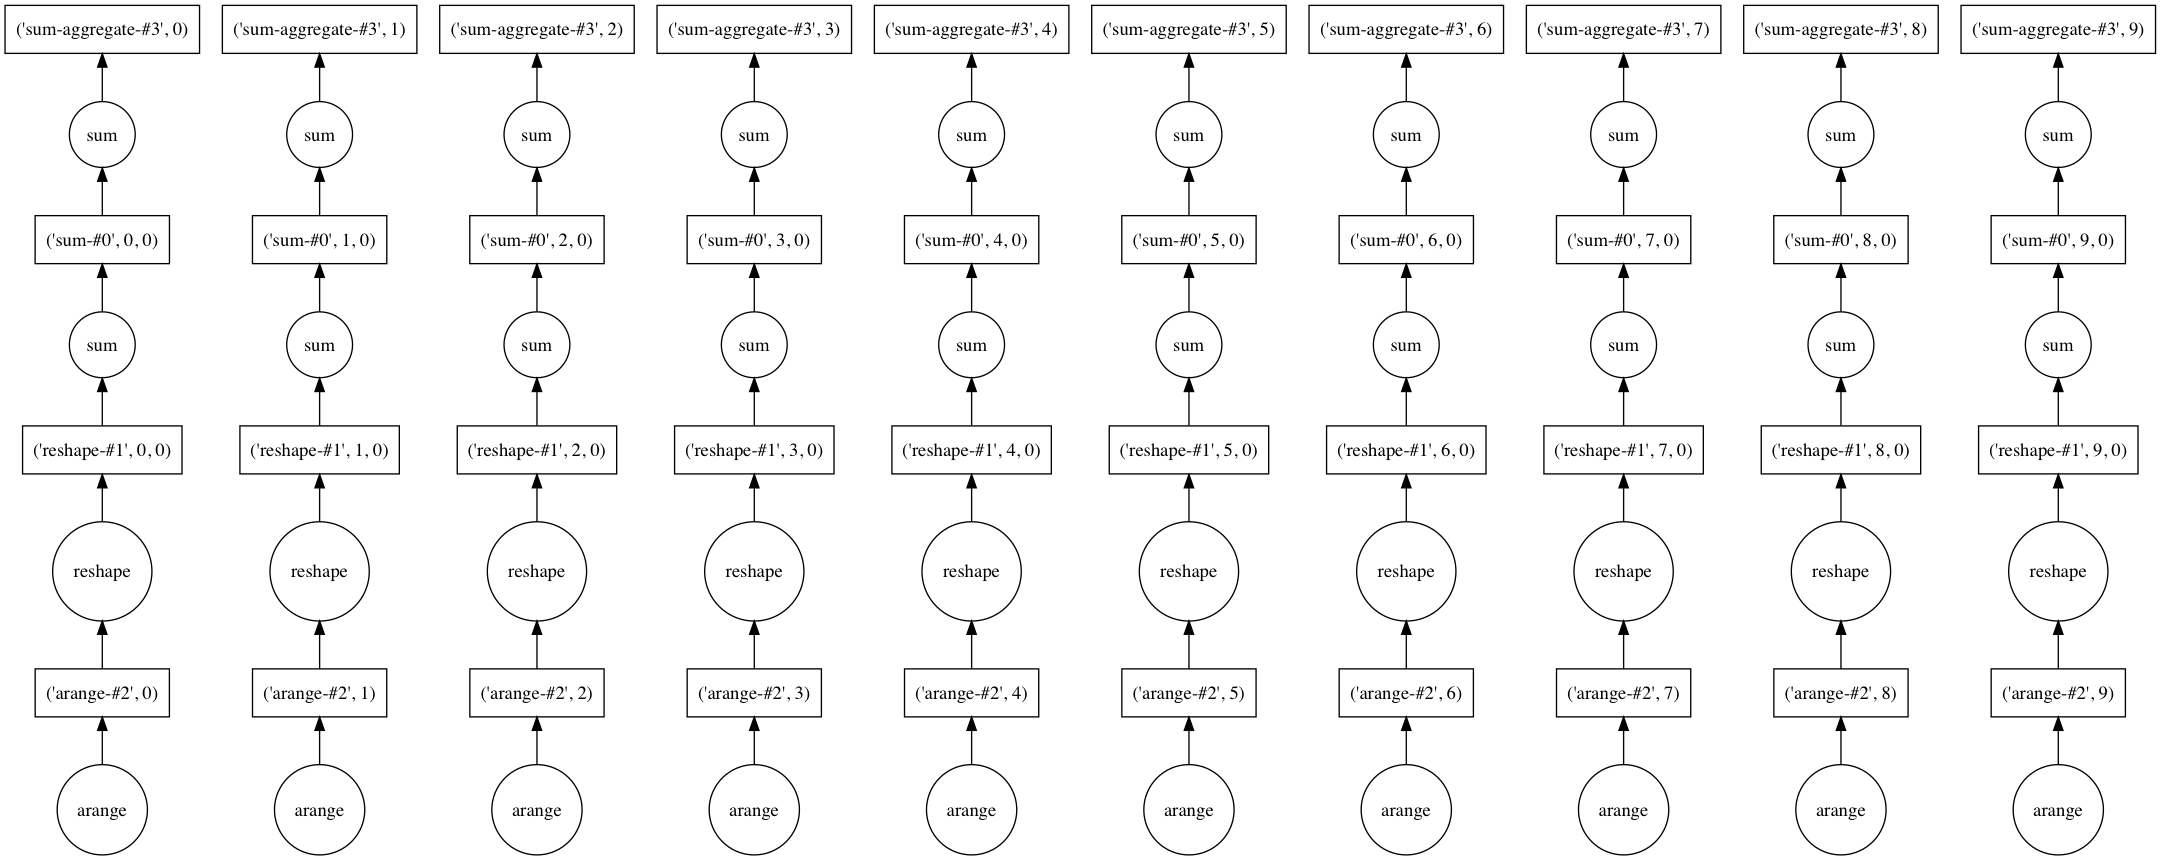

In [17]:
arrsum.visualize()

In [18]:
%time vals = arrsum.compute(get=sprite2.dask.get)

CPU times: user 58.6 ms, sys: 7.34 ms, total: 65.9 ms
Wall time: 229 ms


### Analyze data on s3

In [19]:
b = db.read_text('s3://sayresprite/small.txt', blocksize=1000000)
f = b.str.split().flatten().frequencies().topk(10, lambda x: x[1])

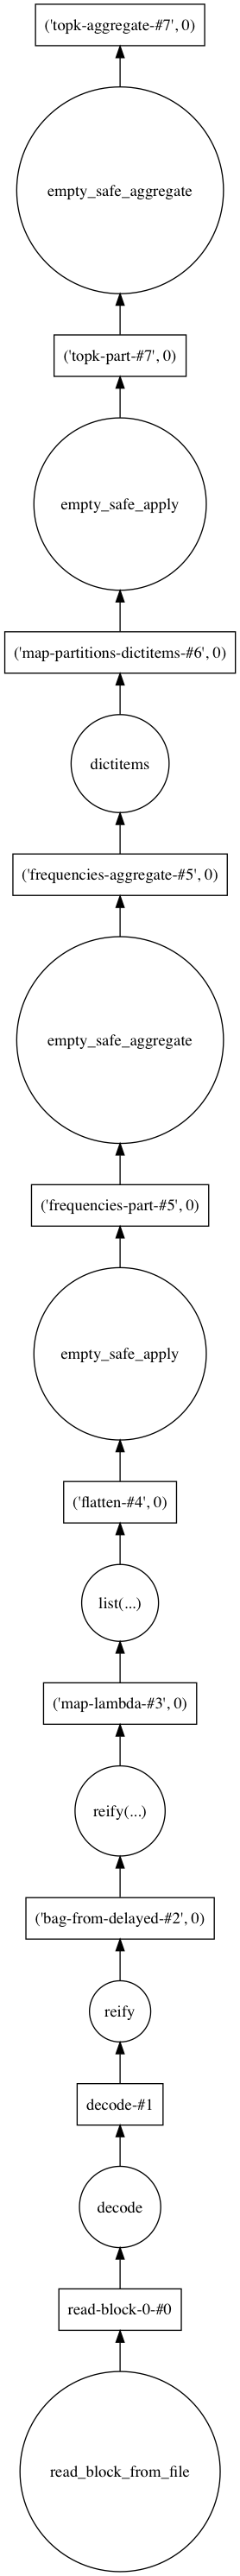

In [20]:
f.visualize()

In [21]:
logger = logging.getLogger('sprite2')
logger.setLevel(logging.DEBUG)
%time f.compute(get=sprite2.dask.get)

DEBUG 2018-04-26 09:32:39,947 ThreadPoolExecutor-23_0: ('bag-from-delayed-decode-flatten-frequencies-aggregate-frequencies-part-map-lambda-map-partitions-dictitems-read-block-topk-part-topk-aggregate-e72ec1d6f70761fd14370324b5a180a0', 0) sending 2.4KB
DEBUG 2018-04-26 09:32:40,325 ThreadPoolExecutor-23_0: ('bag-from-delayed-decode-flatten-frequencies-aggregate-frequencies-part-map-lambda-map-partitions-dictitems-read-block-topk-part-topk-aggregate-e72ec1d6f70761fd14370324b5a180a0', 0) received 434.0bytes
DEBUG 2018-04-26 09:32:40,328 ThreadPoolExecutor-23_0: ('topk-aggregate-e72ec1d6f70761fd14370324b5a180a0', 0) sending 1.2KB
DEBUG 2018-04-26 09:32:40,352 ThreadPoolExecutor-23_0: ('topk-aggregate-e72ec1d6f70761fd14370324b5a180a0', 0) received 262.0bytes


CPU times: user 15.5 ms, sys: 3.92 ms, total: 19.4 ms
Wall time: 410 ms


[('the', 3193),
 ('and', 1328),
 ('a', 1214),
 ('to', 1207),
 ('of', 1170),
 ('in', 673),
 ('was', 673),
 ('he', 512),
 ('his', 511),
 ('on', 399)]

In [22]:
%time f.compute()

CPU times: user 15.2 ms, sys: 22.9 ms, total: 38 ms
Wall time: 529 ms


[('the', 3193),
 ('and', 1328),
 ('a', 1214),
 ('to', 1207),
 ('of', 1170),
 ('in', 673),
 ('was', 673),
 ('he', 512),
 ('his', 511),
 ('on', 399)]